In [151]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [152]:
data =pd.read_csv(r"C:\Users\DELL\Downloads\training_project\student_version.csv")

In [153]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
729,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0
730,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0
731,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
732,60,M,ASY,152,0,0,ST,118,Y,0.0,Up,0


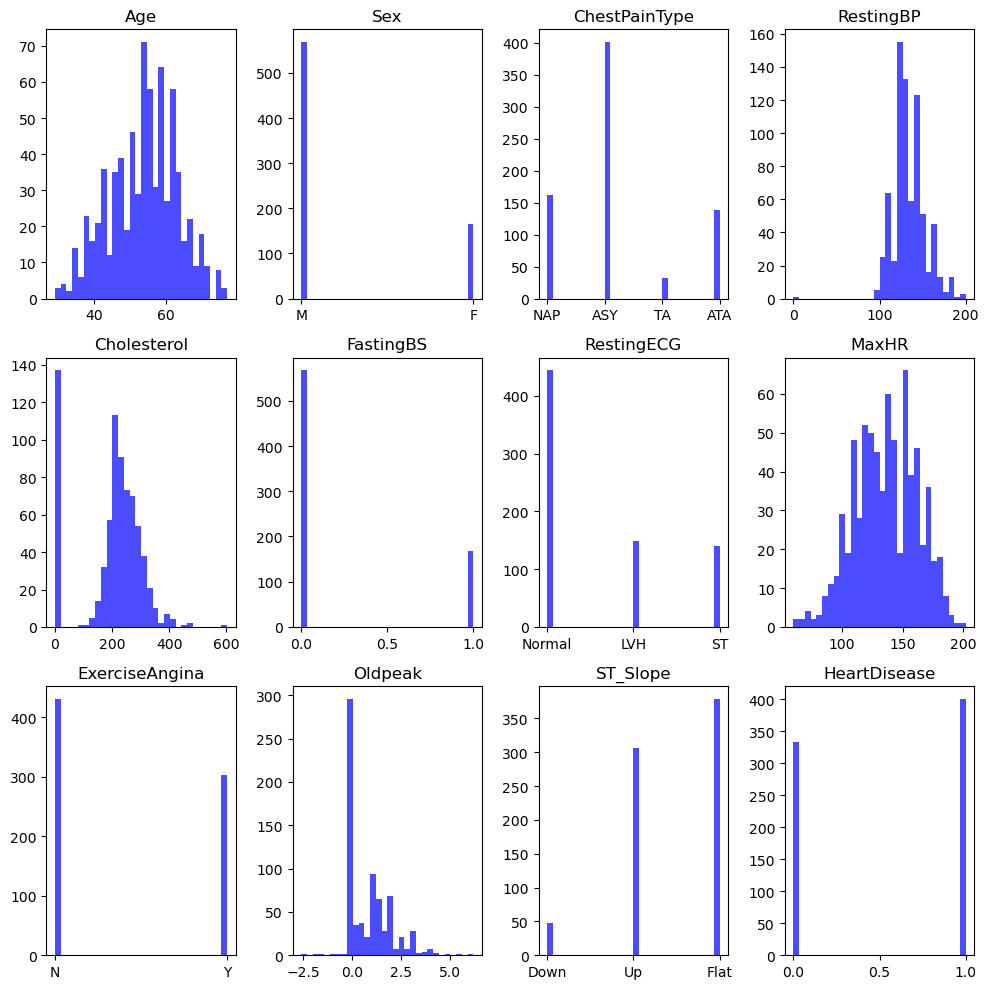

In [154]:
fig, axes = plt.subplots(3, 4, figsize=(10, 10))  # Create 3x6 grid
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy iteration

    # Loop over each column in the dataframe
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=30, color='blue', alpha=0.7)  # Plot histogram
    axes[i].set_title(f'{col}')
   
    
    # Remove unused subplots
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [156]:
data.shape

(734, 12)

In [157]:
data["Sex"].value_counts()

Sex
M    568
F    166
Name: count, dtype: int64

In [158]:
data["Sex"] = data["Sex"].map({"M": 0, "F": 1})

In [159]:
data["ChestPainType"].unique()

array(['NAP', 'ASY', 'TA', 'ATA'], dtype=object)

In [160]:

one_hot_encoded = pd.get_dummies(data["ChestPainType"], prefix="ChestPainType").astype("int")


data = data.drop(columns=["ChestPainType"], axis=1)


data = pd.concat([data, one_hot_encoded], axis=1)


In [161]:
objectslist=[]
for i in data.columns:
    if data[i].dtype=="object":
        objectslist.append(i)
          

In [162]:
objectslist

['RestingECG', 'ExerciseAngina', 'ST_Slope']

In [163]:
one_hot_encoded2=pd.get_dummies(data[objectslist], prefix=objectslist).astype("int")

one_hot_encoded2=one_hot_encoded2.drop(columns=["ExerciseAngina_Y"],axis=1)
data=pd.concat([data,one_hot_encoded2],axis=1)


In [164]:
data.drop(columns=objectslist,axis=1,inplace=True)

In [165]:
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,42,0,120,240,1,194,0.8,0,0,0,1,0,0,1,0,1,1,0,0
1,36,0,130,209,0,178,0.0,0,0,0,1,0,0,1,0,1,0,0,1
2,56,0,150,213,1,125,1.0,1,1,0,0,0,0,1,0,0,0,1,0
3,37,1,130,211,0,142,0.0,0,0,0,1,0,0,1,0,1,0,0,1
4,51,0,120,0,1,104,0.0,1,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,48,1,120,254,0,110,0.0,0,1,0,0,0,0,0,1,1,0,0,1
730,45,0,120,225,0,140,0.0,0,1,0,0,0,0,1,0,1,0,0,1
731,60,0,130,253,0,144,1.4,1,1,0,0,0,0,1,0,0,0,0,1
732,60,0,152,0,0,118,0.0,0,1,0,0,0,0,0,1,0,0,0,1


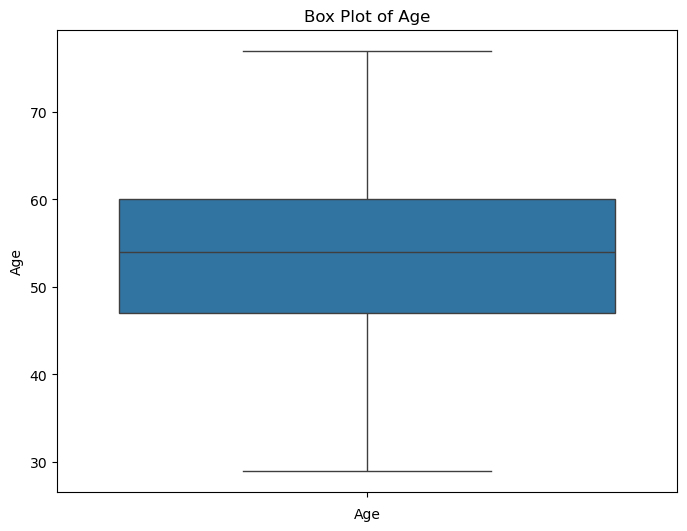

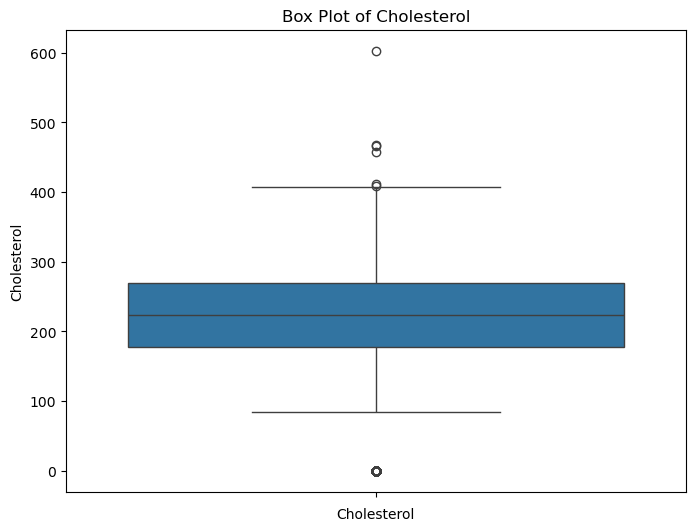

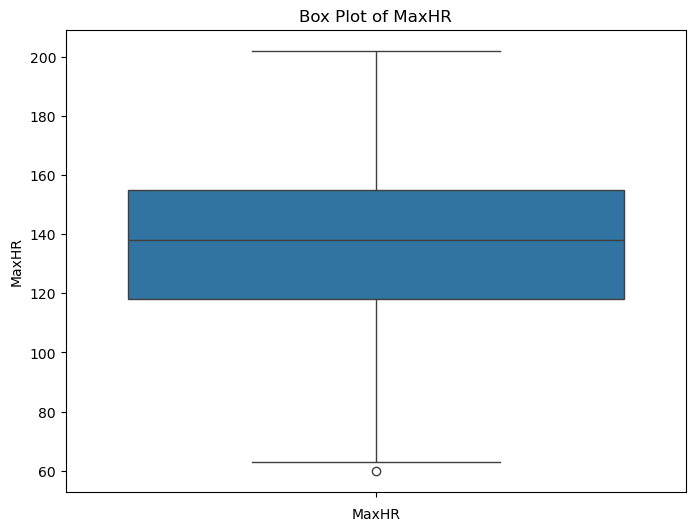

In [166]:
import seaborn as sns


numerical_list = ["Age", "Cholesterol", "MaxHR"]

for col in numerical_list:
   
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


In [167]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # numerical_list=["Cholesterol"]
# # Initialize a dictionary to store outlier labels
# outlier_labels = {col: {'greater_than_max': [], 'less_than_min': []} for col in numerical_list}

# for col in numerical_list:
#     # Calculate the IQR and thresholds
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define the outlier thresholds
#     min_threshold = Q1 - 1.5 * IQR
#     max_threshold = Q3 + 1.5 * IQR
    
#     # Identify outliers
#     greater_than_max = data[data[col] > max_threshold].index
#     less_than_min = data[data[col] < min_threshold].index
    
#     # Update outlier_labels dictionary
#     outlier_labels[col]['greater_than_max'] = list(greater_than_max)
#     outlier_labels[col]['less_than_min'] = list(less_than_min)
    
#     # Clip outliers
#     data[col] = data[col].clip(lower=min_threshold, upper=max_threshold)
    
#     # Plot the box plot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data[col])
#     plt.title(f"Box Plot of {col}")
#     plt.xlabel(col)
#     plt.show()

# # Now outlier_labels contains the indices of outliers
# print(outlier_labels)


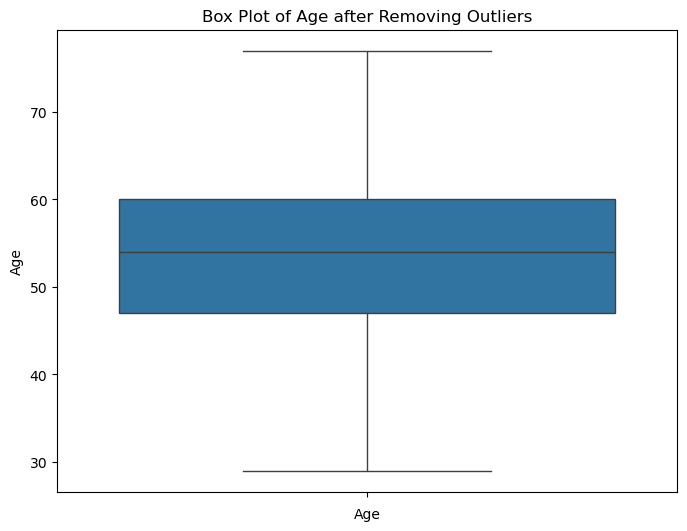

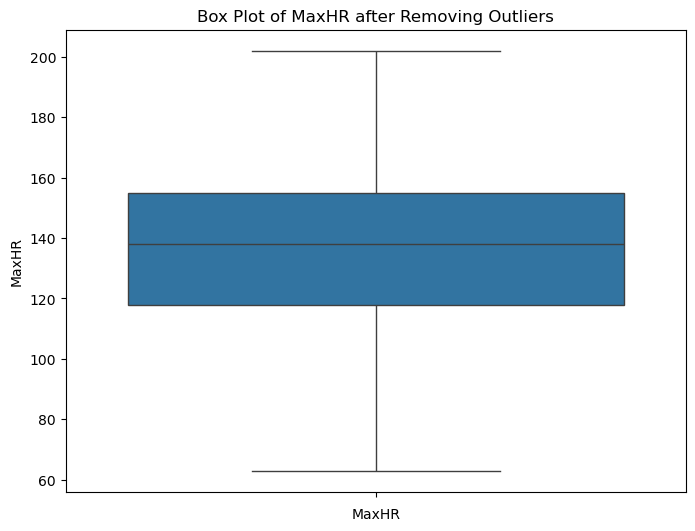

{'Age': {'greater_than_max': [], 'less_than_min': []}, 'MaxHR': {'greater_than_max': [], 'less_than_min': [15]}}
Original shape: (733, 19)
Shape after removing outliers: (733, 19)


In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named `data`
# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Define the numerical columns for which you want to detect outliers
numerical_list = ["Age", "MaxHR"] # Add other columns as needed

# Initialize a dictionary to store outlier labels
outlier_labels = {col: {'greater_than_max': [], 'less_than_min': []} for col in numerical_list}

for col in numerical_list:
    # Calculate the IQR and thresholds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier thresholds
    min_threshold = Q1 - 1.5 * IQR
    max_threshold = Q3 + 1.5 * IQR
    
    # Identify outliers
    greater_than_max = data[data[col] > max_threshold].index
    less_than_min = data[data[col] < min_threshold].index
    
    # Update outlier_labels dictionary
    outlier_labels[col]['greater_than_max'] = list(greater_than_max)
    outlier_labels[col]['less_than_min'] = list(less_than_min)
    
    # Drop rows with outliers
    data = data[~data.index.isin(greater_than_max)]
    data = data[~data.index.isin(less_than_min)]
    
    # Plot the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Box Plot of {col} after Removing Outliers")
    plt.xlabel(col)
    plt.show()

# Now outlier_labels contains the indices of outliers
print(outlier_labels)

# Print the shape of the DataFrame before and after removing outliers
print(f"Original shape: {data.shape}")
print(f"Shape after removing outliers: {data.shape}")


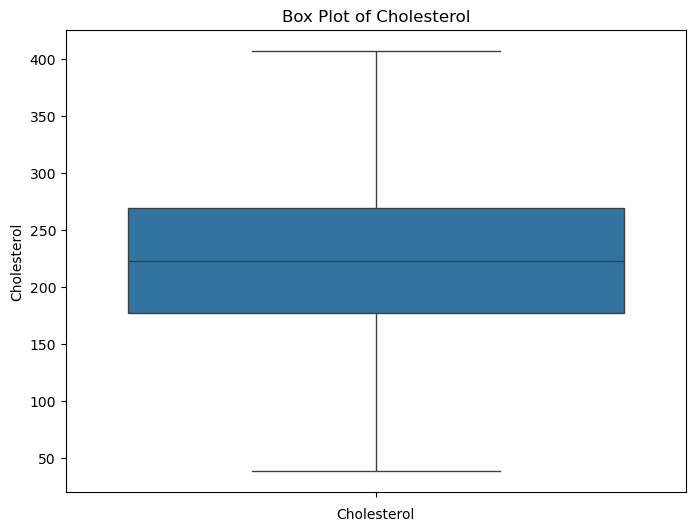

{'Cholesterol': {'greater_than_max': [108, 115, 338, 430, 511, 515], 'less_than_min': [4, 6, 10, 11, 14, 19, 21, 29, 32, 38, 40, 43, 47, 52, 53, 58, 61, 62, 68, 71, 74, 75, 85, 90, 93, 94, 97, 100, 116, 118, 126, 135, 146, 149, 151, 153, 176, 178, 196, 200, 209, 212, 227, 229, 230, 234, 238, 239, 244, 249, 255, 268, 272, 277, 295, 308, 315, 318, 319, 320, 321, 323, 324, 325, 335, 336, 342, 345, 346, 348, 353, 368, 376, 394, 396, 402, 404, 408, 431, 437, 447, 455, 456, 469, 470, 471, 481, 482, 486, 488, 493, 505, 510, 518, 524, 526, 529, 534, 535, 539, 540, 576, 577, 591, 603, 607, 612, 621, 622, 628, 632, 636, 637, 645, 652, 660, 661, 663, 665, 667, 671, 673, 680, 691, 695, 701, 702, 706, 708, 710, 712, 718, 720, 721, 723, 732]}}


In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_list=["Cholesterol"]
# Initialize a dictionary to store outlier labels
outlier_labels = {col: {'greater_than_max': [], 'less_than_min': []} for col in numerical_list}

for col in numerical_list:
    # Calculate the IQR and thresholds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier thresholds
    min_threshold = Q1 - 1.5 * IQR
    max_threshold = Q3 + 1.5 * IQR
    
    # Identify outliers
    greater_than_max = data[data[col] > max_threshold].index
    less_than_min = data[data[col] < min_threshold].index
    
    # Update outlier_labels dictionary
    outlier_labels[col]['greater_than_max'] = list(greater_than_max)
    outlier_labels[col]['less_than_min'] = list(less_than_min)
    
    # Clip outliers
    data[col] = data[col].clip(lower=min_threshold, upper=max_threshold)
    
    # Plot the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

# Now outlier_labels contains the indices of outliers
print(outlier_labels)


(array([136.,   0.,   0.,   1.,   0.,   1.,   1.,   3.,   6.,  11.,  17.,
         27.,  38.,  53.,  70.,  67.,  40.,  44.,  49.,  44.,  32.,  26.,
         19.,  12.,  13.,   4.,   4.,   0.,   7.,   8.]),
 array([ 39.        ,  51.26666667,  63.53333333,  75.8       ,
         88.06666667, 100.33333333, 112.6       , 124.86666667,
        137.13333333, 149.4       , 161.66666667, 173.93333333,
        186.2       , 198.46666667, 210.73333333, 223.        ,
        235.26666667, 247.53333333, 259.8       , 272.06666667,
        284.33333333, 296.6       , 308.86666667, 321.13333333,
        333.4       , 345.66666667, 357.93333333, 370.2       ,
        382.46666667, 394.73333333, 407.        ]),
 <BarContainer object of 30 artists>)

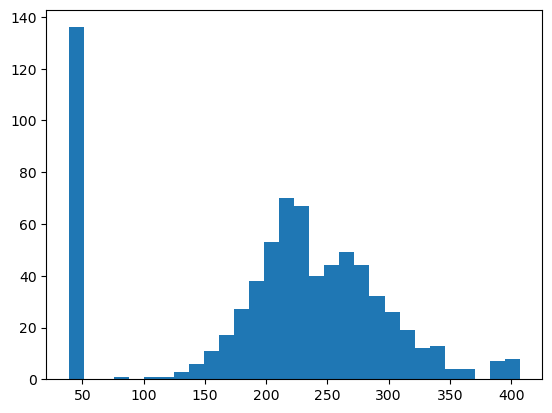

In [170]:
plt.hist(data["Cholesterol"],bins=30)

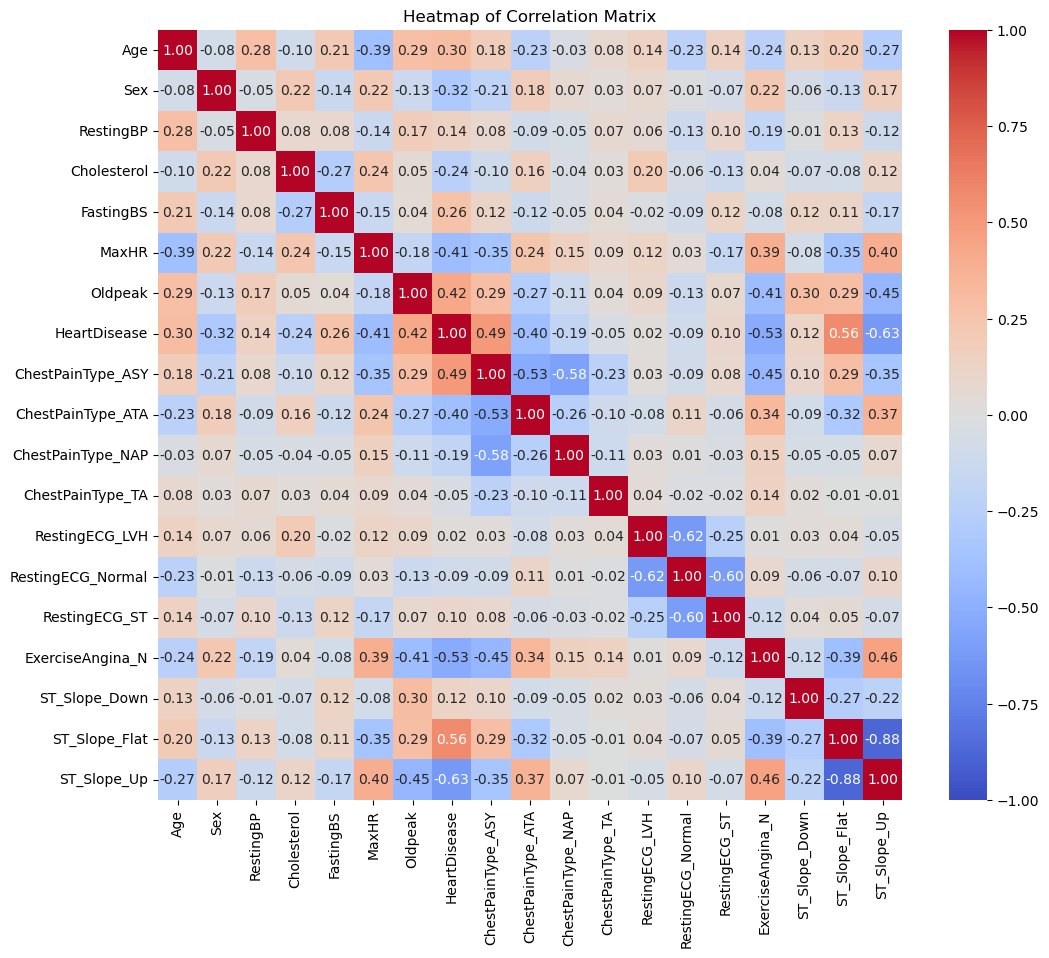

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Add titles and labels
plt.title('Heatmap of Correlation Matrix')
plt.show()


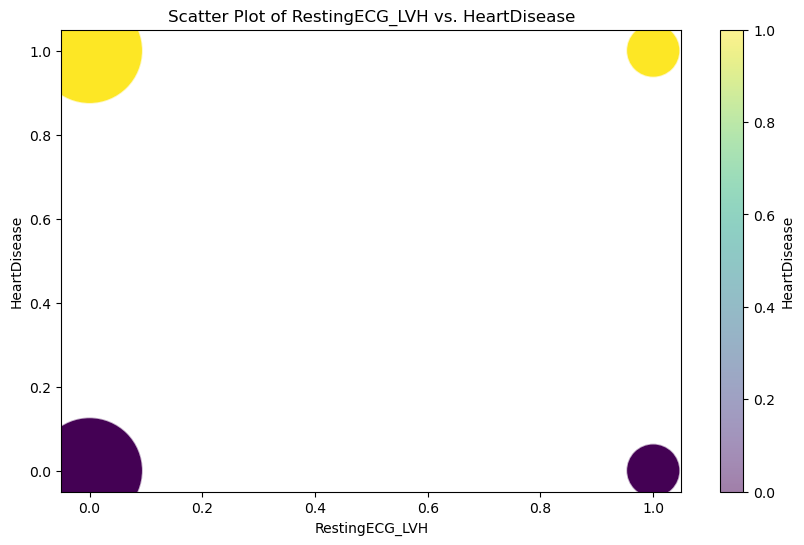

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate the frequency of the value 1 in RestingECG_LVH
value_counts = data["RestingECG_LVH"].value_counts()
# Map the frequency to sizes
sizes = data["RestingECG_LVH"].map(value_counts).fillna(1)  # Fill NaN with 1 for values not appearing in the count

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["RestingECG_LVH"], data["HeartDisease"], s=sizes*10, alpha=0.5, c=data["HeartDisease"], cmap='viridis', edgecolors='w')

# Add titles and labels
plt.title('Scatter Plot of RestingECG_LVH vs. HeartDisease')
plt.xlabel('RestingECG_LVH')
plt.ylabel('HeartDisease')
plt.colorbar(label='HeartDisease')  # Color bar to show the color mapping
plt.show()


In [173]:
data=data.drop(columns=["RestingECG_LVH"],axis=1)

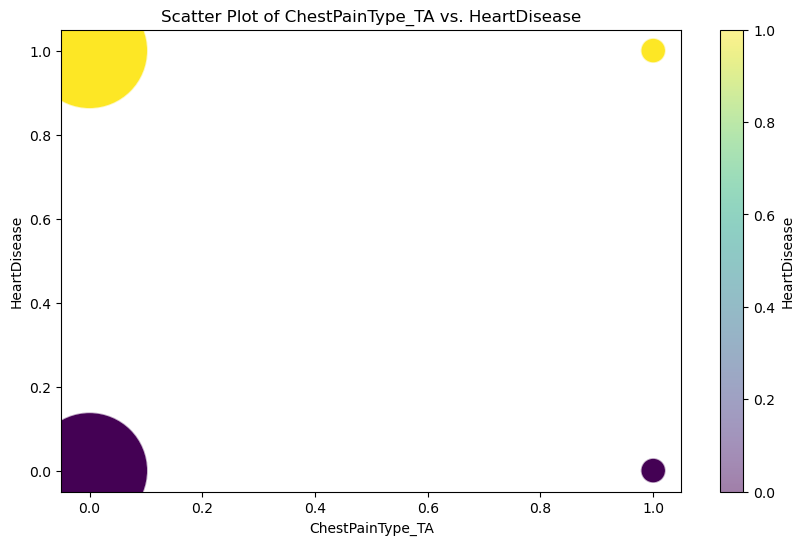

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate the frequency of the value 1 in RestingECG_LVH
value_counts = data["ChestPainType_TA"].value_counts()
# Map the frequency to sizes
sizes = data["ChestPainType_TA"].map(value_counts).fillna(1)  # Fill NaN with 1 for values not appearing in the count

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["ChestPainType_TA"], data["HeartDisease"], s=sizes*10, alpha=0.5, c=data["HeartDisease"], cmap='viridis', edgecolors='w')

# Add titles and labels
plt.title('Scatter Plot of ChestPainType_TA vs. HeartDisease')
plt.xlabel('ChestPainType_TA')
plt.ylabel('HeartDisease')
plt.colorbar(label='HeartDisease')  # Color bar to show the color mapping
plt.show()


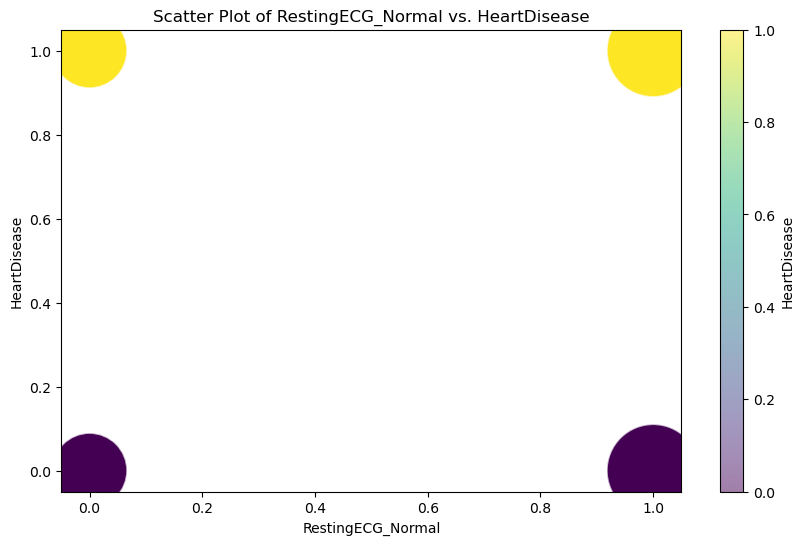

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate the frequency of the value 1 in RestingECG_LVH
value_counts = data["RestingECG_Normal"].value_counts()
# Map the frequency to sizes
sizes = data["RestingECG_Normal"].map(value_counts).fillna(1)  # Fill NaN with 1 for values not appearing in the count

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["RestingECG_Normal"], data["HeartDisease"], s=sizes*10, alpha=0.5, c=data["HeartDisease"], cmap='viridis', edgecolors='w')

# Add titles and labels
plt.title('Scatter Plot of RestingECG_Normal vs. HeartDisease')
plt.xlabel('RestingECG_Normal')
plt.ylabel('HeartDisease')
plt.colorbar(label='HeartDisease')  # Color bar to show the color mapping
plt.show()


In [176]:
data=data.drop(columns=["RestingECG_Normal","RestingECG_ST","ChestPainType_TA","ST_Slope_Flat","ST_Slope_Down","RestingBP","ChestPainType_NAP"],axis=1)

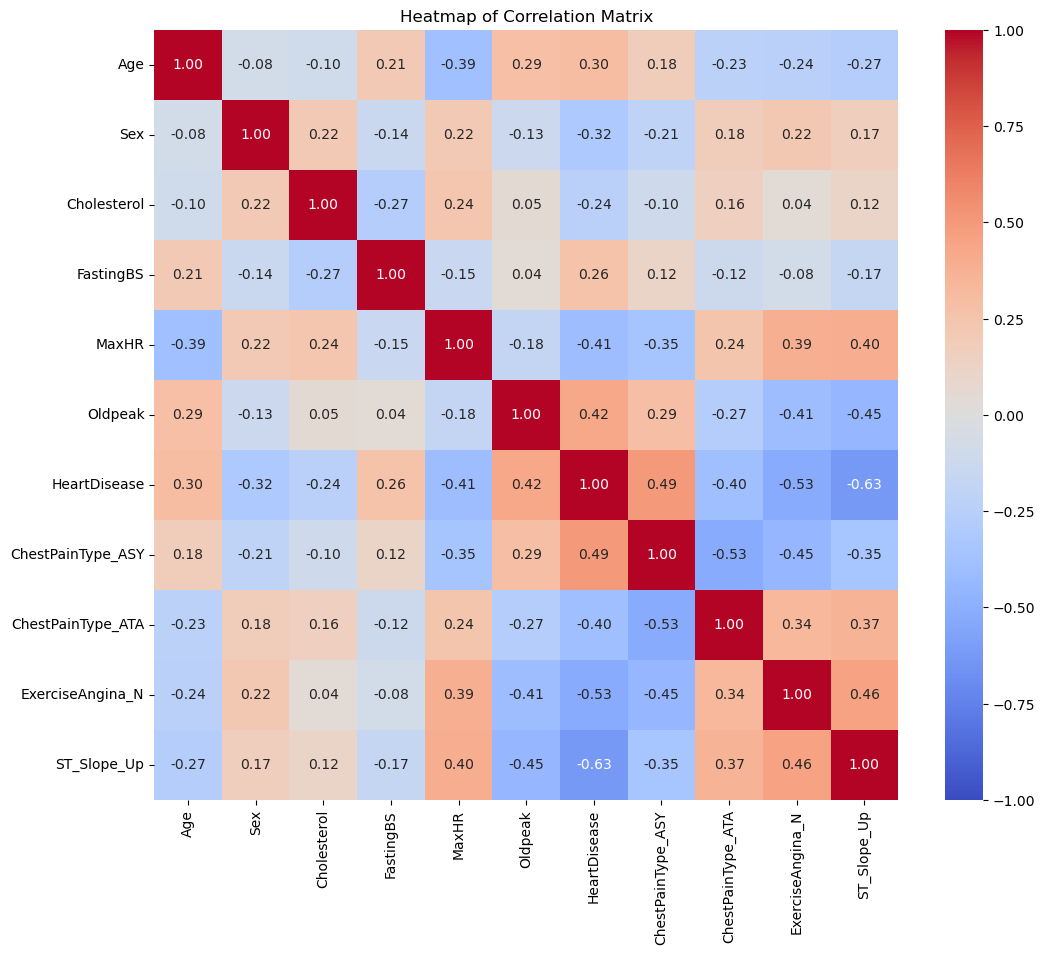

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Add titles and labels
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [178]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
y=data["HeartDisease"]
x=data.drop(columns=["HeartDisease"],axis=1)





x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.2,shuffle=True)
#x_val,x_test,y_val,y_test=train_test_split(x_val,y_val,test_size=.5,shuffle=True)

poly = PolynomialFeatures(degree=3, include_bias=True)

print(f"Original feature shape: {x_train.shape}")
print(x_train.iloc[0])
x_train = poly.fit_transform(x_train)


x_val = poly.transform(x_val)


print(f"Polynomial feature shape: {x_train.shape}")

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
# x_test=scaler.transform(x_test)


Original feature shape: (586, 10)
Age                   53.0
Sex                    0.0
Cholesterol           39.0
FastingBS              1.0
MaxHR                120.0
Oldpeak                1.5
ChestPainType_ASY      1.0
ChestPainType_ATA      0.0
ExerciseAngina_N       1.0
ST_Slope_Up            1.0
Name: 43, dtype: float64
Polynomial feature shape: (586, 286)


In [179]:
y_train.shape

(586,)

In [180]:
import joblib

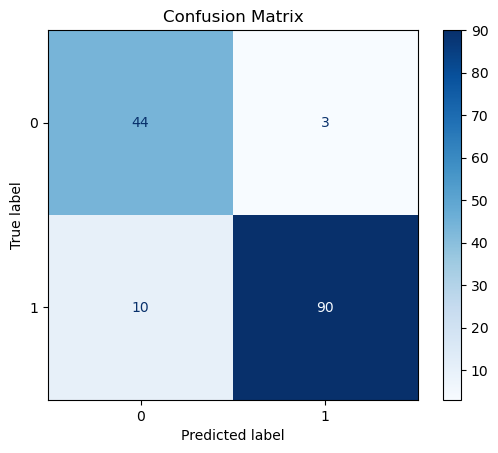

0.9115646258503401


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
logisticmodel=LogisticRegression(max_iter=100000)

logisticmodel.fit(x_train,y_train)
joblib.dump(logisticmodel, 'ml_model.pkl')
y_predicted=logisticmodel.predict(x_val)

accuracy=accuracy_score(y_predicted,y_val)

cm = confusion_matrix(y_val, y_predicted, labels=logisticmodel.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticmodel.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print(accuracy)

Accuracy: 0.85


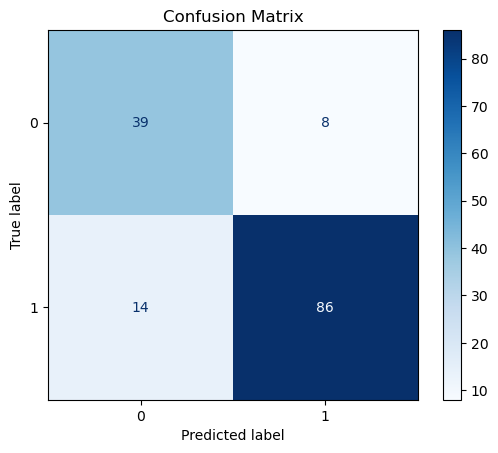

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn_model.fit(x_train, y_train)
joblib.dump(knn_model, 'knn_model.pkl')
# Predict on the validation set
y_predicted = knn_model.predict(x_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_predicted)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_val, y_predicted, labels=knn_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [183]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model=Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' if multi-class with 'softmax'
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                18368     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,481
Trainable params: 20,481
Non-trainable params: 0
_________________________________________________________________


In [184]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Initialize the callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',         # Monitor the validation loss
    factor=0.1,                  # Reduce learning rate by a factor of 0.1
    patience=5,                  # Wait for 5 epochs with no improvement
    verbose=1                    # Print a message when learning rate is reduced
)

early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor the validation loss
    patience=10,                 # Stop training after 10 epochs with no improvement
    verbose=1,                   # Print a message when stopping
    restore_best_weights=True    # Restore the best weights when stopping
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,                    # Adjust the number of epochs as needed
    batch_size=32,                # Adjust the batch size as needed
    callbacks=[reduce_lr, early_stopping]  # Use the callbacks during training
)

Epoch 1/50
19/19 [==============================] - 1s 20ms/step - loss: 0.4621 - accuracy: 0.7969 - val_loss: 0.3168 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8669 - val_loss: 0.3100 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3491 - accuracy: 0.8720 - val_loss: 0.3078 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.3129 - accuracy: 0.8771 - val_loss: 0.3180 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8686 - val_loss: 0.3073 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8669 - val_loss: 0.2960 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.2925 - 

In [185]:
model.save('dp_model.h5')

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.91


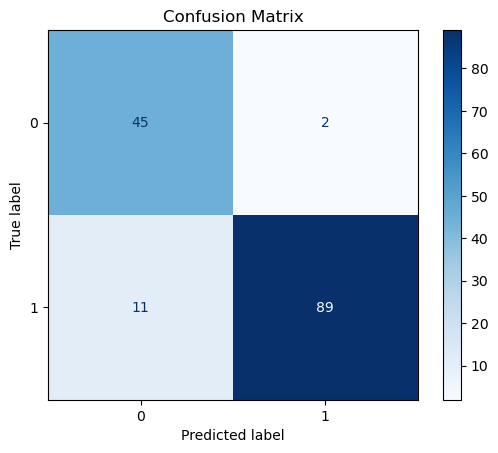

In [186]:
# Predict on the validation set
y_predicted = model.predict(x_val)
y_predicted=(y_predicted>.5).astype("int")
# Calculate accuracy
accuracy = accuracy_score(y_val, y_predicted)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_val, y_predicted, labels=knn_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [187]:
x_train.shape

(586, 286)